# Lista de Exercícios 6: Projeto de Controladores e Controle em Espaço de Estados

> Felipe Andrade Garcia Tommaselli- 11800910

> Gianluca Capezzuto Sardinha - 11876900

- Slide Aula 6: https://marofe.github.io/controle-digital/2024/aula6.html



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cont2discrete, tf2zpk, dlti, dstep
from control.matlab import *

### Questão 1

Nessa atividade o objetivo é verificar o erro em regime permanente para sistemas em tempo discreto.

Para isso, considere a seguinte função de transferência como exemplo:

$$
G(z) = \frac{z}{(z - 1)(1.2706z - 0.7706)}
$$

O seguinte código em Matlab apresenta um exemplo para fazer o gráfico da resposta ao degrau, rampa e parábola do sistema usando `lsim`:

```matlab
%% Resposta ao degrau
td = 0:T:100; % vetor de tempo discreto
y1 = step(Gf, td); % resposta ao degrau
figure(1)
stairs(td, y1, 'LineWidth', 2);
hold on
line([0 20], [1 1], 'linestyle', '--', 'color', 'black')

%% Resposta à rampa
figure(2)
r = td'; % sinal de entrada (rampa)
stairs(td, td, 'k--')
y_ramp = lsim(Gf, r, td); % simula entrada de sinal rampa
stairs(td, y_ramp, 'LineWidth', 2)
figure(3)
plot(r - y_ramp) % mostra sinal de erro (desvio de controle)
title('Erro')

%% Resposta à parábola
y3 = step(Gf*T*z/(z - 1)^2, td);
figure(4)
r = td .* td; % sinal parábola
r = r'; % transposto para tornar vetor coluna
plot(td, td.^2, 'k--')
hold on
y_parab = lsim(Gf, r, td); % simula sinal de entrada tipo parábola
stairs(td, y_parab, '--r')
figure(5)
plot(r - y_parab) % mostra sinal de erro
```

Seguindo a mesma lógica, encontre os erros de regime permanente e apresente os gráficos para entrada degrau, rampa e parábola para o seguinte sistema com $T = 0.5$ s:

$$
G(z) = \frac{0.0912z^3 − 0.0012z^2 − 0.0544z}{z^4 − 2.655z^3 + 2.679z^2 − 1.391z + 0.3679}
$$

Pelos erros em regime permanente, pode-se concluir que esse sistema é tipo 0, tipo 1, tipo 2 ou tipo 3?

Erro em regime permanente para entrada em degrau: 0.024657537856887245


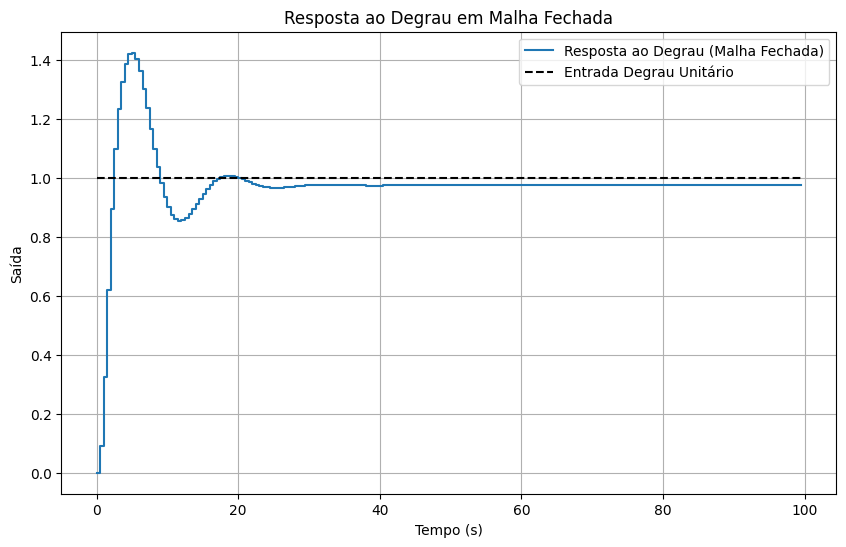

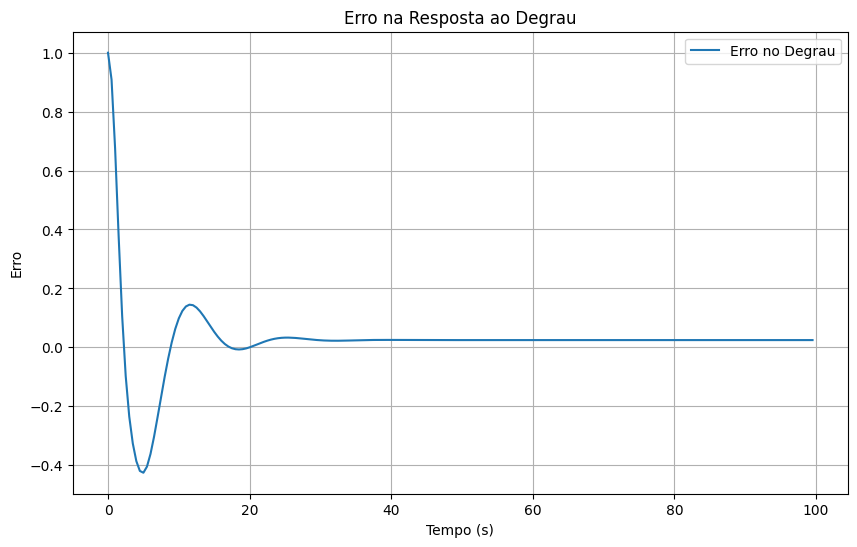

Erro em regime permanente para entrada em rampa: 0.0


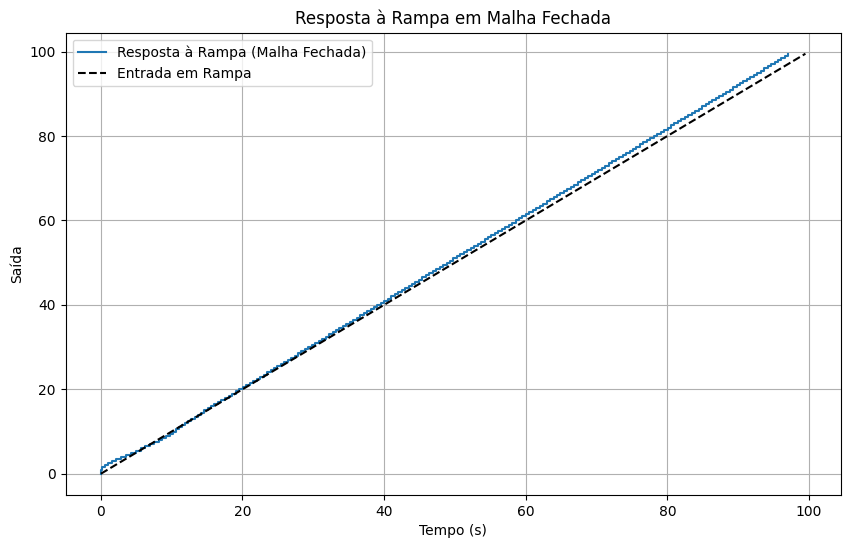

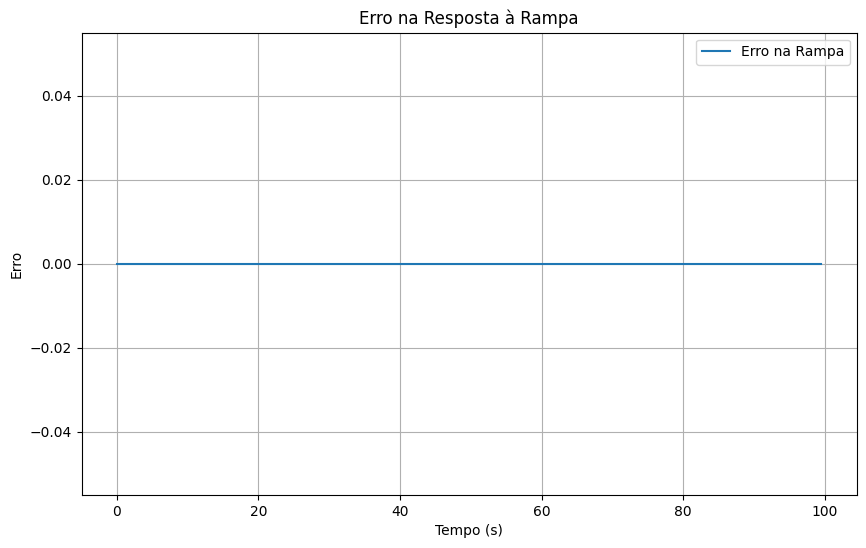

Erro em regime permanente para entrada parabólica: 9362.375


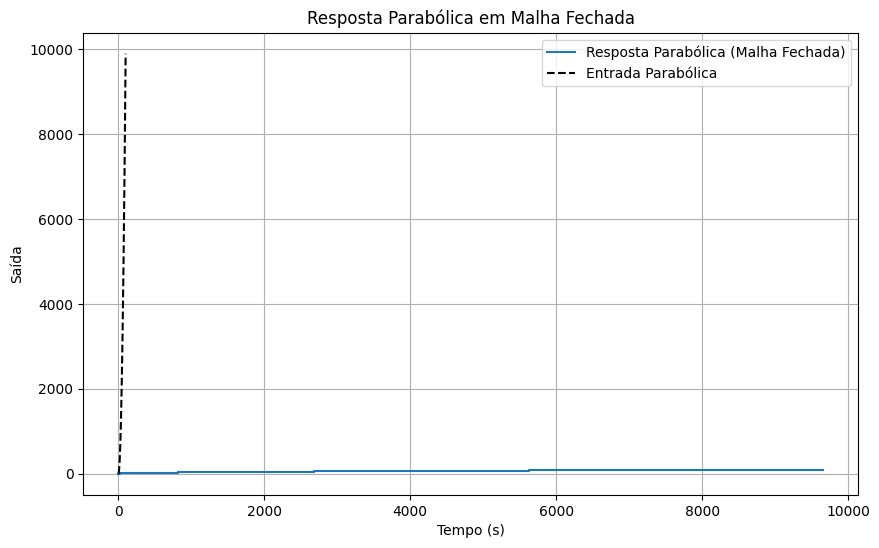

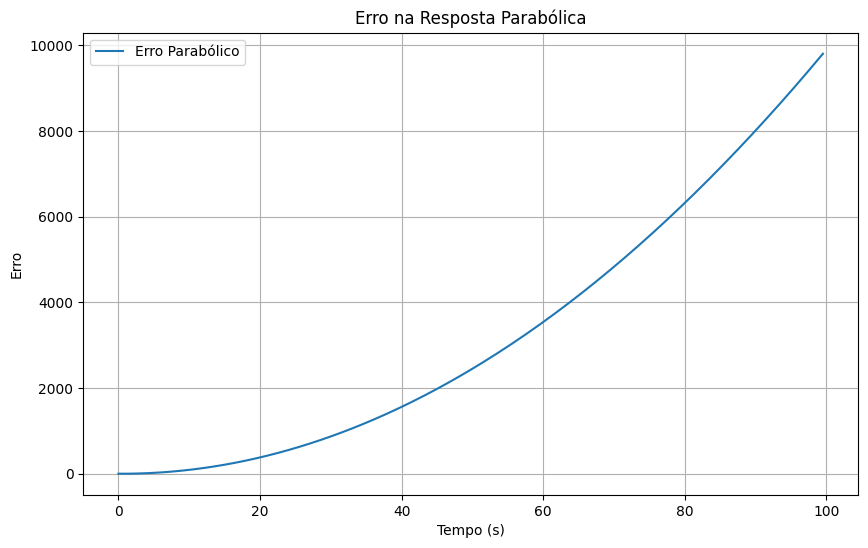

Polos de G(z): [0.99978882+0.03554858j 0.99978882-0.03554858j 0.32771118+0.5100942j
 0.32771118-0.5100942j ]


In [12]:
# Tempo de amostragem e vetor de tempo
T = 0.5
td = np.arange(0, 100, T)

# Função de transferência G(z)
num = [0.0912, -0.0012, -0.0544, 0]
den = [1, -2.655, 2.679, -1.391, 0.3679]
G = tf(num, den, T)

# Função de transferência em malha fechada com realimentação unitaria
G_cl = feedback(G, 1)

# Resposta ao degrau do sistema em malha fechada
y_step, t_step = step(G_cl, td)
erro_degrau = 1 - y_step
print("Erro em regime permanente para entrada em degrau:", np.mean(erro_degrau[-10:]))

# Plotar resposta ao degrau e erro
plt.figure(figsize=(10, 6))
plt.step(td, y_step, where='post', label='Resposta ao Degrau (Malha Fechada)')
plt.plot([0, max(td)], [1, 1], 'k--', label='Entrada Degrau Unitário')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.title('Resposta ao Degrau em Malha Fechada')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t_step, erro_degrau, label='Erro no Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Erro')
plt.title('Erro na Resposta ao Degrau')
plt.legend()
plt.grid(True)
plt.show()

# Resposta à rampa do sistema em malha fechada
rampa = td
t_rampa, y_rampa, _ = lsim(G_cl, U=rampa, T=td)
erro_rampa = rampa - y_rampa
print("Erro em regime permanente para entrada em rampa:", np.mean(erro_rampa[-10:]))

# Plotar resposta à rampa e erro
plt.figure(figsize=(10, 6))
plt.step(t_rampa, y_rampa, where='post', label='Resposta à Rampa (Malha Fechada)')
plt.plot(td, rampa, 'k--', label='Entrada em Rampa')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.title('Resposta à Rampa em Malha Fechada')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(td, erro_rampa, label='Erro na Rampa')
plt.xlabel('Tempo (s)')
plt.ylabel('Erro')
plt.title('Erro na Resposta à Rampa')
plt.legend()
plt.grid(True)
plt.show()

# Resposta parabólica do sistema em malha fechada
parabola = td ** 2
t_parab, y_parab, _ = lsim(G_cl, U=parabola, T=td)
erro_parabola = parabola - y_parab
print("Erro em regime permanente para entrada parabólica:", np.mean(erro_parabola[-10:]))

# Plotar resposta parabólica e erro
plt.figure(figsize=(10, 6))
plt.step(t_parab, y_parab, where='post', label='Resposta Parabólica (Malha Fechada)')
plt.plot(td, parabola, 'k--', label='Entrada Parabólica')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.title('Resposta Parabólica em Malha Fechada')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(td, erro_parabola, label='Erro Parabólico')
plt.xlabel('Tempo (s)')
plt.ylabel('Erro')
plt.title('Erro na Resposta Parabólica')
plt.legend()
plt.grid(True)
plt.show()

# Polos do sistema
polos = np.roots(den)
print("Polos de G(z):", polos)


### Questão 2

Nessa atividade o objetivo é avaliar a região de factibilidade para o projeto de um controlador que atenda a certos critérios de desempenho.

Para isso, considere os polos dominantes de 2° ordem de um sistema em malha-fechada dado por:

$$
\frac{Y(s)}{R(s)} = \frac{\omega_n^2}{s^2 + 2\xi\omega_n s + \omega_n^2}
$$

Suponha que o sistema possa ter um sobressinal máximo de 10%, frequência amortecida $\omega_d \leq 2.5 \, \text{rad/s}$ e $\sigma = \xi \omega_n \geq 1$ com período de amostragem $T = 0.25$ s.

O código em Matlab a seguir apresenta um exemplo para avaliar, de forma gráfica, a região de factibilidade para os critérios de desempenho. Além do mais, o código também apresenta um conjunto de 100 soluções factíveis que atendem aos critérios.

```matlab
close all
clear all
clc
%%
Mp = 0.1;
xi_min = abs(log(Mp)/sqrt(pi^2+log(Mp)^2));
wd_max = 2.5;
sigma_max = 1;
T = 0.25;
dw = 0.001;
wn = 0:dw:4.5*pi;
xi = xi_min;
s1 = -xi*wn + 1j*wn*sqrt(1 - xi^2);
figure
subplot(131)
hold on
line([-1.2*pi 1.2*pi],[0 0],'linewidth',2,'color','black') % eixo real
line([0 0],[-1.2*pi 1.2*pi],'linewidth',2,'color','black') % eixo imag
sgrid
plot(real(s1),imag(s1),'LineWidth',2,'Color','red')
plot(real(s1),-imag(s1),'LineWidth',2,'Color','red')
wd = 0:dw:4*pi;
sigma = 1;
s2 = -sigma + 1j*wd;
plot(real(s2),imag(s2),'LineWidth',2,'Color','blue')
plot(real(s2),-imag(s2),'LineWidth',2,'Color','blue')
wd = wd_max;
sigma = 0:0.001:30;
s3 = -sigma + 1j*wd;
plot(real(s3),imag(s3),'LineWidth',2,'Color','green')
plot(real(s3),-imag(s3),'LineWidth',2,'Color','green')
xlim([-1.2*pi 1.2*pi])
ylim([-1.2*pi 1.2*pi])
subplot(132)
hold on
z1 = exp(s1*T);
z2 = exp(s2*T);
z3 = exp(s3*T);
line([-1.2 1.2],[0 0],'linewidth',2,'color','black') % eixo real
line([0 0],[-1.2 1.2],'linewidth',2,'color','black') % eixo imag
plot(real(z1),imag(z1),'LineWidth',2,'Color','red')
plot(real(z1),-imag(z1),'LineWidth',2,'Color','red')
plot(real(z2),imag(z2),'LineWidth',2,'Color','blue')
plot(real(z2),-imag(z2),'LineWidth',2,'Color','blue')
plot(real(z3),imag(z3),'LineWidth',2,'Color','green')
plot(real(z3),-imag(z3),'LineWidth',2,'Color','green')
zgrid
subplot(133)
hold on
line([0 10],[1+Mp 1+Mp],'linestyle','--','color','black')
%%
for N = 1:100
    sigma = 3 * rand; % xi*wn
    wd = 2.5 * rand; % wn*sqrt(1 - xi^2)
    xi = (sigma / wd) / sqrt(1 + sigma^2 / wd^2);
    wn = wd / xi;
    if -sigma <= -sigma_max && wd <= wd_max && xi >= xi_min
        figure(1)
        subplot(131)
        s = -sigma + 1j * wd;
        plot(real(s), imag(s), 'x', 'Color', 'c', 'LineWidth', 2)
        plot(real(s), -imag(s), 'x', 'Color', 'c', 'LineWidth', 2)
        subplot(132)
        z = exp(s * T);
        plot(real(z), imag(z), 'x', 'Color', 'c', 'LineWidth', 2)
        plot(real(z), -imag(z), 'x', 'Color', 'c', 'LineWidth', 2)
        subplot(133)
        G = tf([wn^2], [1 2 * xi * wn wn^2]);
        t = 0:0.001:10;
        y = step(G, t);
        plot(t, y)
        drawnow
    end
end
```

Repita o código de exemplo para um projeto de controlador com as seguintes especificações:

- Sobressinal: $M_p \leq 15%$
- Tempo de pico: $t_p \leq 0.5$ s
- Tempo de acomodação: $t_s \leq 3$ s (±2%)

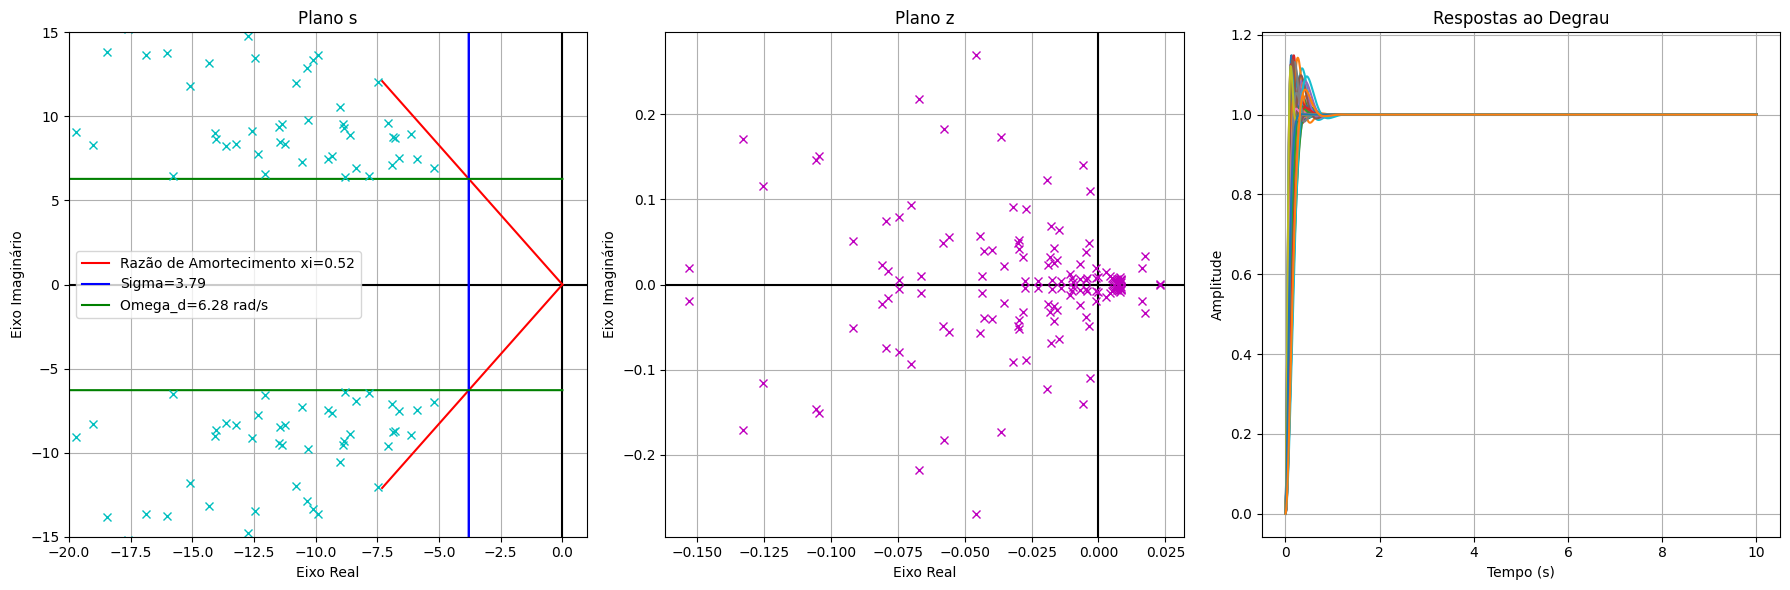

In [13]:
# Especificações
Mp = 0.15
xi_min = -np.log(Mp) / np.sqrt(np.pi**2 + (np.log(Mp))**2)
tp_max = 0.5  # segundos
ts_max = 3    # segundos
T = 0.25      # Período de amostragem

# Restrições calculadas
wd_min = np.pi / tp_max             # Frequência natural amortecida mínima
sigma_min = 4 / ts_max              # Sigma mínimo
omega_n_min = wd_min / np.sqrt(1 - xi_min**2)  # Frequência natural mínima
sigma_min = xi_min * omega_n_min    # Atualiza sigma_min com base em omega_n_min

dw = 0.001
wn = np.arange(0, 4.5 * np.pi, dw)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].set_title('Plano s')
axs[0].set_xlabel('Eixo Real')
axs[0].set_ylabel('Eixo Imaginário')
axs[0].grid(True)
axs[0].axhline(0, color='black')
axs[0].axvline(0, color='black')

# Curva de razão de amortecimento para xi_min
s1 = -xi_min * wn + 1j * wn * np.sqrt(1 - xi_min**2)
axs[0].plot(np.real(s1), np.imag(s1), 'r', label=f'Razão de Amortecimento xi={xi_min:.2f}')
axs[0].plot(np.real(s1), -np.imag(s1), 'r')

# Linha de Sigma para sigma_min
linha_sigma = -sigma_min + 1j * np.linspace(-20, 20, len(wn))
axs[0].plot(np.real(linha_sigma), np.imag(linha_sigma), 'b', label=f'Sigma={sigma_min:.2f}')
axs[0].plot(np.real(linha_sigma), -np.imag(linha_sigma), 'b')

# Linha de Omega_d para wd_min
linha_omega_d = np.linspace(-20, 0, len(wn)) + 1j * wd_min
axs[0].plot(np.real(linha_omega_d), np.imag(linha_omega_d), 'g', label=f'Omega_d={wd_min:.2f} rad/s')
axs[0].plot(np.real(linha_omega_d), -np.imag(linha_omega_d), 'g')

axs[0].legend()
axs[0].set_xlim([-20, 1])
axs[0].set_ylim([-15, 15])

axs[1].set_title('Plano z')
axs[1].set_xlabel('Eixo Real')
axs[1].set_ylabel('Eixo Imaginário')
axs[1].grid(True)
axs[1].axhline(0, color='black')
axs[1].axvline(0, color='black')

axs[2].set_title('Respostas ao Degrau')
axs[2].set_xlabel('Tempo (s)')
axs[2].set_ylabel('Amplitude')
axs[2].grid(True)

# Gerar soluções viáveis
for _ in range(100):
    # Gerar valores aleatórios de xi e sigma dentro das restrições
    xi = xi_min + (0.99 - xi_min) * np.random.rand()
    sigma = sigma_min + (20 - sigma_min) * np.random.rand()
    
    # Calcular omega_n e omega_d
    omega_n = sigma / xi
    omega_d = omega_n * np.sqrt(1 - xi**2)
    
    # Calcular métricas de desempenho
    tp = np.pi / omega_d
    ts = 4 / sigma
    
    # Verificar se os parâmetros gerados atendem às especificações
    if tp <= tp_max and ts <= ts_max:
        # Polos no plano s
        s = -sigma + 1j * omega_d
        axs[0].plot(s.real, s.imag, 'cx')
        axs[0].plot(s.real, -s.imag, 'cx')
        
        # Polos no plano z
        z = np.exp(s * T)
        axs[1].plot(z.real, z.imag, 'mx')
        axs[1].plot(z.real, -z.imag, 'mx')
        
        # Resposta ao degrau
        sys = tf([omega_n**2], [1, 2 * xi * omega_n, omega_n**2])
        t = np.linspace(0, 10, 1000)
        y, t = step(sys, T=t)
        axs[2].plot(t, y)
        
plt.tight_layout()
plt.show()


### Questão 3

Nessa atividade, o objetivo é usar os recursos computacionais do Matlab para projetar um controlador para um sistema LIT SISO via Emulação.

Para isso, considere a planta em tempo contínuo descrita por:

$$
G(s) = \frac{1}{s(s + 0.3)}
$$

Deseja-se projetar um controlador em tempo contínuo com a seguinte estrutura:

$$
C(s) = K \frac{s - a}{s - b}
$$

De tal forma que o sistema em malha fechada apresente sobressinal máximo de 16.3% ($M_p \leq 16.3\%$) e tempo de pico $t_p = 1$ s.

Uma forma de fazer o projeto para esse sistema é seguir os passos:

1. **Obtenção de $\xi$ e $\omega_n$**:  
   Supondo que a dinâmica do sistema em malha fechada siga os polos dominantes de 2° ordem, temos:  
   Como $M_p = 16.3\%$, obtemos:

   $$
   \xi = \frac{\ln(M_p)}{\sqrt{\pi^2 + \ln(M_p)^2}} = 0.5
   $$

   Como $t_p = 1$ s, a frequência amortecida é:

   $$
   \omega_d = \frac{\pi}{t_p} = \pi \, \text{rad/s}
   $$

   Portanto, a frequência natural é:

   $$
   \omega_n = \frac{\omega_d}{\sqrt{1 - \xi^2}} = 3.62 \, \text{rad/s}
   $$

2. **Escolha do tempo de amostragem**:  
   Como $\omega_d = \pi \, \text{rad/s}$, o período de oscilação amortecida do sistema é $T_d = \frac{2\pi}{\omega_d} = 2$ s. Portanto, é desejável um período de amostragem menor que 0.2 s (10x a frequência de oscilação do sistema).

3. **Polos dominantes**:  
   Sabendo que os polos para um sistema de 2° ordem padrão são dados por:

   $$
   s_{1,2} = -\xi \omega_n \pm j\omega_n \sqrt{1 - \xi^2}
   $$

   Para este exemplo:

   $$
   s_{1,2} = -1.81 \pm j\pi
   $$

   Para atender aos critérios de desempenho, o Lugar Geométrico das Raízes (LGR) do sistema compensado deve passar por esses polos.

4. **Sintonia do compensador**:  
   A sintonia do controlador consiste em encontrar os valores de $a$ e $b$ que satisfaçam os critérios de desempenho especificados para o sistema de controle. Isso pode ser feito analiticamente ou via algoritmos de otimização.

   Como existe um polo estável em $s = -0.3$, podemos escolher $a = -0.3$ para cancelar esse polo, resultando em:

   $$
   C(s)G(s) = K \frac{(s + 0.3)}{s - b} \frac{1}{s(s + 0.3)} = K \frac{1}{s(s - b)}
   $$

   Em malha fechada:

   $$
   \frac{Y(s)}{R(s)} = \frac{C(s)G(s)}{1 + C(s)G(s)} = \frac{K}{s^2 - bs + K}
   $$

   Conclui-se que:

   $$
   K = \omega_n^2 = 13.16, \quad b = -2\xi\omega_n = -3.62
   $$

   Portanto, o controlador resultante é:

   $$
   C(s) = 13.16 \frac{s + 0.3}{s + 3.62}
   $$

   Fazendo a discretização pelo método de mapeamento casado de polos e zeros com $T = 0.2$ s:

   $$
   C_d(z) = \frac{9.6416(z - 0.9418)}{z - 0.484}
   $$

   A equação a diferenças que implementa este controlador é:

   $$
   u[k] = 0.494u[k - 1] + 9.6416e[k] - 9.08e[k - 1]
   $$

O seguinte código em Matlab simula esse controlador para diferentes tempos de amostragem:

```matlab
close all
clear all
clc
%%
Mp = 0.163;
tp = 1;
s = tf('s');
G = 1/(s*(s + 0.3))
%%
xi = abs(abs(log(Mp) / sqrt(pi^2 + log(Mp)^2)))
wd = pi / tp
wn = wd / sqrt(1 - xi^2)
Td = 2 * pi / wd
fd = 1 / Td
fs = 10 * fd
Ts = 1 / fs
sigma = xi * wn
a = -0.3;
K = wn^2
b = -2 * sigma
%% Tempo contínuo
C = zpk(a, b, K)
figure
rlocus(C * G)
hold on
Gf = C * G / (1 + C * G);
p = pole(Gf)
plot(real(p), imag(p), 'xr', 'LineWidth', 2)
ylim([-4 4])
info = stepinfo(Gf)
dt = 0.0001;
t = 0:dt:10;
y = step(Gf, t);
figure
plot(t, y, 'LineWidth', 1.5)
hold on
%% Tempo discreto (emulação)
Ts = [0.2 0.1 0.01];
for i = 1:numel(Ts)
    Cd = c2d(C, Ts(i), 'matched');
    Gd = c2d(G, Ts(i), 'matched');
    Gfd = Cd * Gd / (1 + Cd * Gd);
    td = 0:Ts(i):10;
    info = stepinfo(Gfd)
    yd = step(Gfd, td);
    stairs(td, yd, 'LineWidth', 1.5)
end
line([0 max(t)], [1 1], 'color', 'black', 'linestyle', '--')
legend('Contínuo', 'Ts=0.2', 'Ts=0.1', 'Ts=0.01')
```

Usando a mesma estratégia descrita anteriormente, projete um controlador para a planta:

$$
G(s) = \frac{1}{s(s + 0.5)}
$$
​
Que garanta:
- $M_p \leq 12%$
- $t_p \leq 2$ s

Escolha um tempo de amostragem 10x menor que o tempo de oscilação amortecida do sistema e depois repita com tempos de amostragem cada vez menores.

O que pode-se concluir em relação ao comportamento em tempo discreto e tempo contínuo?

In [14]:
def step_info(t, y, SettlingTimeThreshold=0.02):
    """
    Computes step response characteristics.
    
    Parameters:
    - t: time array
    - y: response array
    - SettlingTimeThreshold: threshold for settling time (default is 2%)
    
    Returns:
    A dictionary containing rise time, settling time, overshoot, etc.
    """
    import numpy as np
    
    y_final = y[-1]
    y_initial = y[0]
    y_peak = np.max(y)
    y_undershoot = np.min(y)
    Overshoot = (y_peak - y_final) / (y_final - y_initial) * 100 if y_final != y_initial else 0
    Undershoot = (y_final - y_undershoot) / (y_final - y_initial) * 100 if y_final != y_initial else 0
    
    # Rise time 
    try:
        t_rise_start = t[np.where(y >= y_initial + 0.1 * (y_final - y_initial))[0][0]]
        t_rise_end = t[np.where(y >= y_initial + 0.9 * (y_final - y_initial))[0][0]]
        RiseTime = t_rise_end - t_rise_start
    except IndexError:
        RiseTime = np.nan
    
    # Settling time 
    SettlingIndices = np.where(np.abs(y - y_final) > SettlingTimeThreshold * np.abs(y_final - y_initial))[0]
    if len(SettlingIndices) > 0:
        SettlingTime = t[SettlingIndices[-1]]
    else:
        SettlingTime = 0
    
    # Peak time
    PeakTime = t[np.argmax(y)]
    
    info = {
        'RiseTime': RiseTime,
        'SettlingTime': SettlingTime,
        'SettlingMin': np.min(y),
        'SettlingMax': np.max(y),
        'Overshoot': Overshoot,
        'Undershoot': Undershoot,
        'Peak': y_peak,
        'PeakTime': PeakTime,
        'SteadyStateValue': y_final
    }
    
    return info

Razão de Amortecimento (xi): 0.5594
Frequência Natural Amortecida (omega_d): 1.5708 rad/s
Frequência Natural (omega_n): 1.8951 rad/s
Sigma: 1.0601 rad/s
Período de Oscilação Amortecida (Td): 4.0000 s
Tempos de Amostragem (Ts): [0.4, 0.2, 0.1, 0.05]
Zero do Controlador (a): -0.5
Polo do Controlador (b): -2.1203
Ganho do Controlador (K): 3.5913

Informações da Resposta ao Degrau do Sistema em Tempo Contínuo:
RiseTime: 0.9289999999999999
SettlingTime: 3.088
SettlingMin: 0.0
SettlingMax: 1.1200000000000179
Overshoot: 11.997213155960994
Undershoot: 100.0
Peak: 1.1200000000000179
PeakTime: 2.0
SteadyStateValue: 1.0000248831552345

Informações da Resposta ao Degrau do Sistema em Tempo Discreto com T = 0.400 s:
RiseTime: 0.8000000000000002
SettlingTime: 6.4
SettlingMin: 0.0
SettlingMax: 1.3845524224158163
Overshoot: 39.45476761914795
Undershoot: 100.0
Peak: 1.3845524224158163
PeakTime: 1.6
SteadyStateValue: 0.9928326195322628

Informações da Resposta ao Degrau do Sistema em Tempo Discreto com 

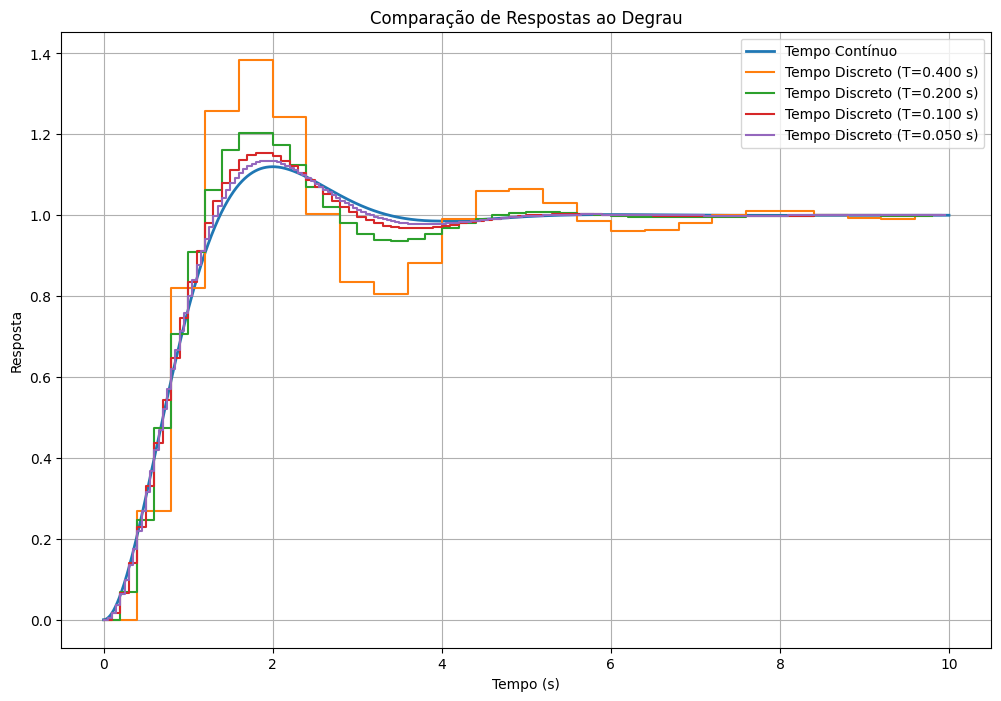

In [15]:
# Especificações
Mp = 0.12       # Sobressinal máximo (12%)
tp = 2          # Tempo de pico (segundos)

# Planta G(s)
s = tf('s')
G = 1 / (s * (s + 0.5))

# Passo 3: Calcular xi e omega_n
xi = -np.log(Mp) / np.sqrt(np.pi**2 + (np.log(Mp))**2)
omega_d = np.pi / tp
omega_n = omega_d / np.sqrt(1 - xi**2)
sigma = xi * omega_n

print(f"Razão de Amortecimento (xi): {xi:.4f}")
print(f"Frequência Natural Amortecida (omega_d): {omega_d:.4f} rad/s")
print(f"Frequência Natural (omega_n): {omega_n:.4f} rad/s")
print(f"Sigma: {sigma:.4f} rad/s")

# Passo 4: Escolher tempos de amostragem
Td = 2 * np.pi / omega_d
print(f"Período de Oscilação Amortecida (Td): {Td:.4f} s")
Ts = [Td / 10, Td / 20, Td / 40, Td / 80]  # Tempos de amostragem
print("Tempos de Amostragem (Ts):", Ts)

# Passo 5: Projetar o controlador
a = -0.5                     # Zero do controlador
b = -2 * sigma               # Polo do controlador
K = omega_n**2               # Ganho do controlador

print(f"Zero do Controlador (a): {a}")
print(f"Polo do Controlador (b): {b:.4f}")
print(f"Ganho do Controlador (K): {K:.4f}")

# Controlador em tempo contínuo C(s)
C = K * (s - a) / (s - b)

# Sistema de malha fechada em tempo contínuo
Gf = feedback(C * G, 1)

# Vetor de tempo para simulação em tempo contínuo
t_cont = np.arange(0, 10, 0.001)

# Resposta ao degrau do sistema em tempo contínuo
y_cont, t_cont = step(Gf, T=t_cont)

# Plotar a resposta em tempo contínuo
plt.figure(figsize=(12, 8))
plt.plot(t_cont, y_cont, label='Tempo Contínuo', linewidth=2)

# Analisar características da resposta ao degrau
info_cont = step_info(t_cont, y_cont)
print("\nInformações da Resposta ao Degrau do Sistema em Tempo Contínuo:")
for key, value in info_cont.items():
    print(f"{key}: {value}")

# Simular para diferentes tempos de amostragem
for T in Ts:
    # Discretizar o controlador e a planta
    Cd = c2d(C, T, method='zoh')
    Gd = c2d(G, T, method='zoh')
    
    # Sistema de malha fechada em tempo discreto
    Gfd = feedback(Cd * Gd, 1)
    
    # Vetor de tempo para simulação em tempo discreto
    t_disc = np.arange(0, 10, T)
    
    # Resposta ao degrau do sistema em tempo discreto
    y_disc, t_disc = step(Gfd, T=t_disc)
    
    # Plotar a resposta em tempo discreto
    plt.step(t_disc, y_disc, where='post', label=f'Tempo Discreto (T={T:.3f} s)', linewidth=1.5)
    
    # Analisar características da resposta ao degrau
    info_disc = step_info(t_disc, y_disc)
    print(f"\nInformações da Resposta ao Degrau do Sistema em Tempo Discreto com T = {T:.3f} s:")
    for key, value in info_disc.items():
        print(f"{key}: {value}")

# Configurações do gráfico
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.title('Comparação de Respostas ao Degrau')
plt.legend()
plt.grid(True)
plt.show()


## Atividade 4
  
Nessa atividade, o objetivo é projetar um controlador direto no domínio Z. Para isso, considere o primeiro passo e discretizar a planta considerando o ZOH. Uma forma prática de fazer é tomar o método degrau-invariante,

$$ Gd = c2d(G, 'zoh') $$

Considerando novamente o exemplo da atividade 3, tem-se  

$$ Gd(z) = \frac{Kg}{(z - \alpha)(z - 1)(z - \beta)} $$  

com $$ Kg = 0.0196 $$, $$ \alpha = -0.9802 $$ e $$ \beta = 0.9418 $$.

Em seguida, busca-se obter a função de transferência do controlador na forma  

$$ C(z) = \frac{K(z - a)}{z - b} $$  

Pode-se escolher o zero do controlador de forma a cancelar o polo estável do sistema, resultando em

$$ C(z)Gd(z) = \frac{KgK(z - \alpha)}{(z - b)(z - 1)} $$  

Em malha-fechada, se torna:  

$$ \frac{Y(z)}{R(z)} = \frac{KgK(z - a)}{z^2 - (b + 1 - KgK)z + (b - KgK\alpha)} $$  

Da mesma forma que no exemplo da atividade 3, os polos dominantes em malha fechada devem ser  

$$ s_{1,2} = -1.81 \pm j\pi $$  

Fazendo o mapeamento para o plano-z, com $$ T = 0.2s $$, resulta em  

$$ z_{1,2} = e^{s_{1,2}T} = 0.5629 \pm j0.4089 $$  

Logo, a equação característica em malha-fechada é  

$$ (z - z_1)(z - z_2) = z^2 - \gamma z + \rho $$  

com $$ \gamma = 1.1258 $$ e $$ \rho = 0.4841 $$. Assim, a sintonia do controlador deve satisfazer  

$$ 
\begin{cases} 
b - KgK = \gamma - 1 \\
b - KgK\alpha = \rho 
\end{cases} 
$$  

A solução, então, é dada por $$ b = 0.3067 $$, $$ K = 9.2294 $$

Dessa forma, o controlador resultante é  

$$ C(z) = \frac{9.2294z - 0.9418}{z - 0.3067} $$  

O código Matlab a seguir simula esse controlador.

```matlab
close all
clear all
clc
%%
Mp = 0.163;
tp = 1;
s = tf('s');
G = 1/(s*(s+0.3))
%%
xi = abs(abs(log(Mp)/sqrt(pi^2+log(Mp)^2)))
wd = pi/tp
wn = wd/sqrt(1-xi^2)
Td = 2*pi/wd
fd = 1/Td
fs = 10*fd
Ts = 1/fs
sigma = xi*wn
a = -0.3;
K = wn^2
b = -2*sigma
%% Tempo discreto
Ts = 0.2;
Cd = zpk(0.9418, 0.3067, 9.2294, Ts)
Gd = c2d(G, Ts, 'zoh');
Gfd = Cd*Gd/(1+Cd*Gd);
td = 0:Ts:10;
info = stepinfo(Gfd)
yd = step(Gfd, td);
stairs(td, yd, 'LineWidth', 1.5)
line([0 max(td)], [1 1], 'color', 'black', 'linestyle', '--')
legend('Ts=0.2')
```

Seguindo a mesma lógica, projete um controlador diretamente no domínio Z para a planta  

$$ G(s) = \frac{1}{s(s + 0.5)} $$  

que garanta:  

- $$ M_p \leq 12\% $$  
- $$ t_p \leq 2s $$  

Escolha um tempo de amostragem 10x menor que o tempo de oscilação amortecida do sistema.


In [16]:
# Especificações fornecidas
Mp = 0.12      # Sobressinal máximo ≤12%
tp = 2         # Tempo de pico ≤2s

# Calcular a razão de amortecimento ξ
xi = -np.log(Mp) / np.sqrt(np.pi**2 + (np.log(Mp))**2)

# Calcular a frequência natural ω_n
wd = np.pi / tp
wn = wd / np.sqrt(1 - xi**2)

# Calcular o amortecimento σ e a frequência natural amortecida ω_d
sigma = xi * wn
wd = wn * np.sqrt(1 - xi**2)

# Calcular o período de oscilação amortecida Td e o tempo de amostragem Ts
Td = 2 * np.pi / wd
Ts = Td / 10  # O tempo de amostragem é 10x menor que o período de oscilação amortecida

# Planta em tempo contínuo G(s)
num = [1]
den = [1, 0.5, 0]

# Discretizar G(s) usando ZOH
system = (num, den)
Gd_num, Gd_den, _ = cont2discrete(system, Ts, method='zoh')

# Extrair zeros, polos e ganho de Gd(z)
Gd_num = Gd_num.flatten()
Gd_den = Gd_den.flatten()
zeros, polos, Kg = tf2zpk(Gd_num, Gd_den)

# Encontrar o polo estável α para cancelar (o polo dentro do círculo unitário mais próximo de zero)
polos_estaveis = [p for p in polos if abs(p) < 1]
alpha = min(polos_estaveis, key=lambda x: abs(x))

# Polos desejados de malha fechada no domínio z
s1 = -sigma + 1j * wd
s2 = -sigma - 1j * wd
z1 = np.exp(s1 * Ts)
z2 = np.exp(s2 * Ts)

# Coeficientes da equação característica desejada
gamma = 2 * z1.real
rho = abs(z1)**2

# Parâmetros do controlador
a = alpha.real  # Cancelar o polo estável α
# Configurar as equações para resolver K e b
# Equação 1: -Kg * K + b = gamma - 1
# Equação 2: -Kg * K * alpha + b = rho

A = np.array([[-Kg, 1],
              [-Kg * alpha, 1]])
B = np.array([gamma - 1,
              rho])

# Resolver para K e b
K, b = np.linalg.solve(A, B)

# Definir o controlador C(z) = K * (z - a) / (z - b)
Cd_num = K * np.array([1, -a])
Cd_den = np.array([1, -b])
Cd = dlti(Cd_num, Cd_den, dt=Ts)

# Definir a planta em tempo discreto Gd(z)
Gd = dlti(Gd_num, Gd_den, dt=Ts)

# Sistema de malha fechada Gfd(z) = (Cd * Gd) / (1 + Cd * Gd)
# Calcular o numerador e denominador do sistema de malha aberta
num_ol = np.polymul(Cd_num, Gd_num)
den_ol = np.polymul(Cd_den, Gd_den)

# Função de transferência de malha fechada (numerador e denominador)
num_cl = num_ol
den_cl = np.polyadd(den_ol, num_ol)

# Definir o sistema de malha fechada
Gfd = dlti(num_cl, den_cl, dt=Ts)

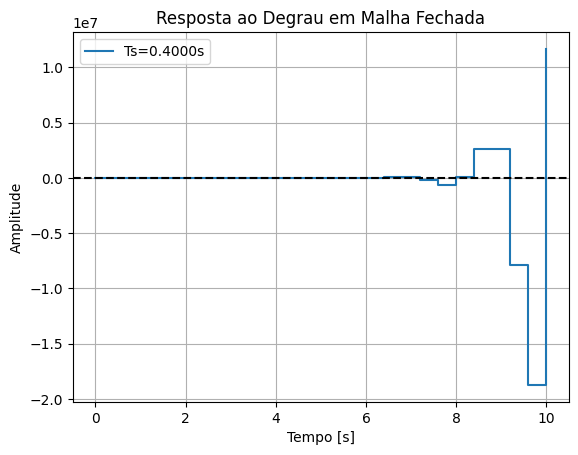

Controlador C(z) = 27.1994 * (z - 0.8187) / (z - 2.0967)
Sobressinal (Mp): 12.0%
Tempo de Pico (tp): 2s
Tempo de Amostragem (Ts): 0.4000s


In [17]:
# Simular a resposta ao degrau
t = np.arange(0, 10 + Ts, Ts)
tout, yout = dstep(Gfd, t=t)
yout = np.squeeze(yout)

# Plotar a resposta ao degrau
plt.figure()
plt.step(tout, yout, where='post', label=f'Ts={Ts:.4f}s')
plt.axhline(1, color='black', linestyle='--')
plt.title('Resposta ao Degrau em Malha Fechada')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Imprimir os parâmetros do controlador e especificações
print(f"Controlador C(z) = {K:.4f} * (z - {a:.4f}) / (z - {b:.4f})")
print(f"Sobressinal (Mp): {Mp*100:.1f}%")
print(f"Tempo de Pico (tp): {tp}s")
print(f"Tempo de Amostragem (Ts): {Ts:.4f}s")

## Atividade 5  
Dada a função de transferência em cascata com um zero order hold (ZOH) e realimentação unitária:  

$$ G(s) = \frac{15}{(s + 2)(s + 4)} $$  

Projete um controlador cujo sobressinal máximo seja $$ M_p \leq 10\% $$, tempo de acomodação $$ t_s \leq 2s $$ e erro para entrada a degrau nulo. Considere $$ T = 0.05s $$.  

Encontre a equação a diferenças que implementa o controlador calculado.  

Num mesmo gráfico, trace a resposta ao degrau do sistema original e do sistema compensado. O sistema atendeu às especificações? Caso não atenda, explique os motivos.


In [20]:
# Especificações fornecidas
Mp = 0.10      # Sobressinal máximo ≤10%
ts = 2         # Tempo de assentamento ≤2s
T = 0.05       # Tempo de amostragem

# Calcular a razão de amortecimento ξ
lnMp = np.log(Mp)
xi = -lnMp / np.sqrt(np.pi**2 + lnMp**2)

# Calcular a frequência natural ω_n
omega_n = 4 / (xi * ts)

# Calcular a frequência natural amortecida ω_d
omega_d = omega_n * np.sqrt(1 - xi**2)

# Polos desejados em tempo contínuo
s1 = -xi * omega_n + 1j * omega_d
s2 = -xi * omega_n - 1j * omega_d

# Mapear os polos para o domínio z
z1 = np.exp(s1 * T)
z2 = np.exp(s2 * T)

# Equação característica desejada no domínio z
desired_den = np.poly([z1, z2])

# Planta em tempo contínuo G(s)
num = [15]
den = [1, 6, 8]  # (s + 2)(s + 4)

# Discretizar G(s) usando ZOH
system = (num, den)
Gd_num, Gd_den, dt = cont2discrete(system, T, method='zoh')
Gd_num = Gd_num.flatten()
Gd_den = Gd_den.flatten()

# Como precisamos de erro em regime permanente zero, incluímos um integrador no controlador
# Suponha o controlador C(z) = Kc * (z - a) / (z - 1)

# Função de transferência de malha aberta (numerador e denominador)
# Gd(z) * C(z) = [Gd_num(z) * Kc * (z - a)] / [Gd_den(z) * (z - 1)]

# Denominador de malha fechada: Den_CL(z) = Gd_den(z)*(z - 1) + Gd_num(z)*Kc*(z - a)

# Calcular Den_ol(z)
Den_ol = np.convolve(Gd_den, [1, -1])

# Escolher um zero para o controlador, por exemplo, a = 0.5
a = 0.5

# Calcular Num_ol(z)
Num_ol = np.convolve(Gd_num, [1, -a])

# Preencher Den_ol e Num_ol para que tenham o mesmo comprimento
max_len = max(len(Den_ol), len(Num_ol))
Den_ol = np.pad(Den_ol, (max_len - len(Den_ol), 0), 'constant')
Num_ol = np.pad(Num_ol, (max_len - len(Num_ol), 0), 'constant')

# O denominador desejado deve corresponder ao denominador de malha fechada
desired_den = np.pad(desired_den, (max_len - len(desired_den), 0), 'constant')

# Definir as equações para resolver Kc
# Den_CL = Den_ol + Kc * Num_ol
# Den_CL deve corresponder a desired_den

# Formular as equações
A = Num_ol.reshape(-1, 1)
B = desired_den - Den_ol

# Resolver Kc usando mínimos quadrados
Kc, residuals, rank, s = np.linalg.lstsq(A, B, rcond=None)

# Numerador e denominador do sistema de malha fechada
Num_cl = np.convolve(Gd_num, [1, -a]) * Kc[0]
Den_cl = Den_ol + Num_ol * Kc[0]

# Definir o sistema de malha fechada
Gd_cl = dlti(Num_cl, Den_cl, dt=T)

# Definir o sistema original sem controlador
Gd_open = dlti(Gd_num, Gd_den, dt=T)




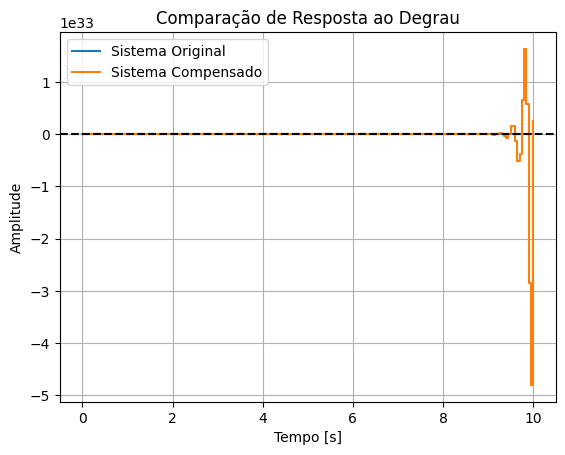

Controlador C(z): Kc = 55.7060, a = 0.5
Equação de diferença implementando o controlador:
u[k] = u[k-1] + 55.7060 * (e[k] - 0.5 * e[k-1])
Sobressinal Máximo: 566.04%
Tempo de Assentamento: 10.00 s
O sistema não atende às especificações.
O sobressinal excede 10%: 566.04%
O tempo de assentamento excede 2s: 10.0


In [21]:
# Vetor de tempo para simulação
t = np.arange(0, 10 + T, T)

# Resposta ao degrau do sistema original
_, y_open = dstep(Gd_open, n=len(t))
y_open = np.squeeze(y_open)

# Resposta ao degrau do sistema compensado
_, y_cl = dstep(Gd_cl, n=len(t))
y_cl = np.squeeze(y_cl)

# Plotar respostas ao degrau
plt.figure()
plt.step(t, y_open, where='post', label='Sistema Original')
plt.step(t, y_cl, where='post', label='Sistema Compensado')
plt.axhline(1, color='black', linestyle='--')
plt.title('Comparação de Resposta ao Degrau')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Imprimir a equação do controlador
print(f"Controlador C(z): Kc = {Kc[0]:.4f}, a = {a}")
print(f"Equação de diferença implementando o controlador:")
print(f"u[k] = u[k-1] + {Kc[0]:.4f} * (e[k] - {a} * e[k-1])")

# Verificar se o sistema atende às especificações

# Calcular o valor em regime permanente
y_inf = y_cl[-1]

# Calcular o sobressinal máximo
overshoot = (np.max(y_cl) - y_inf) / y_inf * 100
print(f"Sobressinal Máximo: {overshoot:.2f}%")

# Calcular o tempo de assentamento (tempo em que a saída fica dentro de 2% de y_inf)
within_bounds = np.abs(y_cl - y_inf) <= 0.02 * y_inf
indices = np.where(within_bounds)[0]

if indices.size > 0:
    # Encontrar o primeiro tempo em que a saída entra dentro dos limites e permanece dentro
    for idx in indices:
        if np.all(within_bounds[idx:]):
            ts_cl = t[idx]
            break
    else:
        ts_cl = None
else:
    ts_cl = None

if ts_cl is not None:
    print(f"Tempo de Assentamento: {ts_cl:.2f} s")
else:
    print("Tempo de Assentamento: Não atingiu o regime dentro do tempo de simulação")

# Verificar se as especificações são atendidas
if overshoot <= 10 and (ts_cl is not None and ts_cl <= 2):
    print("O sistema atende às especificações.")
else:
    print("O sistema não atende às especificações.")
    if overshoot > 10:
        print(f"O sobressinal excede 10%: {overshoot:.2f}%")
    if ts_cl is None or ts_cl > 2:
        print(f"O tempo de assentamento excede 2s: {ts_cl if ts_cl else 'Não atingiu o regime dentro do tempo de simulação'}")